<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">INFO</h1>

In this script, we compare players `Random1`, `Random2` and `Random3` in a game where there is only one cheese to catch in a maze without mud. \
All programs are evaluated on the same game configurations. \
We do not show the game interface here, to make the script faster. \
The goal is to compare the performances of the different random players in the same conditions.

<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">IMPORTS</h1>

In [1]:
# External imports
import sys
import os
import tqdm.auto as tqdm
import matplotlib.pyplot as pyplot
import scipy.stats as scstats

# Add needed directories to the path
sys.path.append(os.path.join("..", "players"))

# PyRat imports
from pyrat import Game, GameMode
from Exhaustive import Exhaustive
from Greedy import Greedy

/home/lotsalan/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">CONSTANTS</h1>

In this script, we are going to make multiple independent games. \
The goal is to collect enough statistics to draw conclusions on which algorithm is better than the other. \
This constant defines how many games are made.

In [2]:
# Determines how many games will be played for each player
NB_GAMES = 20

Let's configure the game with a dictionary. \
Note that we put the game mode as `SIMULATION` to perform all games as fast as possible.

In [3]:
# Customize the game elements
CONFIG = {"mud_percentage": 20.0,
          "nb_cheese": 5,
          "game_mode": GameMode.SIMULATION}

<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">RUN THE GAMES</h1>

Let us now perform all games. \
For each game, we remember the number of turns needed to complete it.

In [4]:
# Players to test (keys are legends to appear in the plot)
players = {"Greedy": {"class": Greedy, "args": {}},
           "Exhaustive": {"class": Exhaustive, "args": {}}}

# Run the games for each player
results = {player: [] for player in players}
for key in players:
    for seed in tqdm.tqdm(range(NB_GAMES), desc=key):
        
        # Make the game with given seed
        game = Game(random_seed=seed, **CONFIG)
        player = players[key]["class"](**players[key]["args"])
        game.add_player(player)
        stats = game.start()
        
        # Store the number of turns needed
        results[key].append(stats["turns"])

Greedy:   0%|          | 0/20 [00:00<?, ?it/s]

Greedy:   0%|          | 0/20 [00:00<?, ?it/s]


AssertionError: Argument 'gui_speed' must be positive

<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">ANALYZE THE RESULTS</h1>
           
Now that all games are performed, we plot the percentage of games completed as a function of the number of turns elapsed.

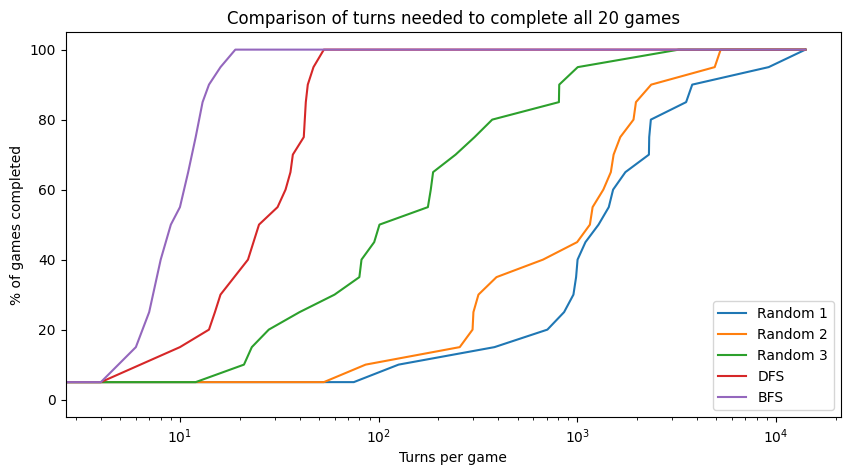

In [5]:
# Visualization of cumulative curves of numbers of turns taken per program
max_turn = max([max(results[player]) for player in results])
pyplot.figure(figsize=(10, 5))
for player in results:
    turns = [0] + sorted(results[player]) + [max_turn]
    games_completed_per_turn = [len([turn for turn in results[player] if turn <= t]) * 100.0 / NB_GAMES for t in turns]
    pyplot.plot(turns, games_completed_per_turn, label=player)
pyplot.title("Comparison of turns needed to complete all %d games" % (NB_GAMES))
pyplot.xlabel("Turns per game")
pyplot.ylabel("% of games completed")
pyplot.xscale("log")
pyplot.legend()
pyplot.show()

Visualizing is great, but it may be hard to conclude with just a plot. \
Here, we perform a statistical test that will give more insight on whether an algorithm is better than the other.

In [6]:
# Formal statistics to check if these curves are statistically significant
for i, player_1 in enumerate(results):
    for j, player_2 in enumerate(results):
        if j > i:
            test_result = scstats.mannwhitneyu(results[player_1], results[player_2], alternative="two-sided")
            print("Mann-Whitney U test between turns of program '%s' and of program '%s':" % (player_1, player_2), test_result)

Mann-Whitney U test between turns of program 'Random 1' and of program 'Random 2': MannwhitneyuResult(statistic=np.float64(237.0), pvalue=np.float64(0.3234817459216911))
Mann-Whitney U test between turns of program 'Random 1' and of program 'Random 3': MannwhitneyuResult(statistic=np.float64(352.0), pvalue=np.float64(4.165760351260581e-05))
Mann-Whitney U test between turns of program 'Random 1' and of program 'DFS': MannwhitneyuResult(statistic=np.float64(400.0), pvalue=np.float64(6.757379406313896e-08))
Mann-Whitney U test between turns of program 'Random 1' and of program 'BFS': MannwhitneyuResult(statistic=np.float64(400.0), pvalue=np.float64(6.700376361164955e-08))
Mann-Whitney U test between turns of program 'Random 2' and of program 'Random 3': MannwhitneyuResult(statistic=np.float64(331.0), pvalue=np.float64(0.0004155021525085159))
Mann-Whitney U test between turns of program 'Random 2' and of program 'DFS': MannwhitneyuResult(statistic=np.float64(399.5), pvalue=np.float64(7.27